# Linear Regression


### Linear Regression Assumptions
1. Linearity
2. No endogeneity: expressed as the covariance of the error. Is the prohibition of a link between the independent variables and the errors. 
    * Omitted variable bias: when you forget to include a relevant variable
3. Normality and homoscedasticity: Normality means the error term is normally distributed. Homoscedasticity means constant/equal variance.
    * The mean of error is expected to be 0
    * homoscadasticity: e.g. for a dataset doesn't have homoscadasticity (heteroscedasticity) --> for smaller values, the data is closer to the regression line, for bigger values, the data is further to the regression line --> the regression line is only good for smaller values.
    * solutions for heteroscadasticity:
        1. Look for ommitted variable bias
        2. look for outliers and try to remove them
        3. Log transformation using np.log(column) function, creating semi-log model or log-log model. Semi-log model is to only transform x variable or y variable, log-log model is to transform both x variable and y variable.
4. No autocorrelation/ no serial correlation: errors are assumed to be uncorrelated
    * to detect autocorrelation: 
        1. graph all the residuals and look for patterns. If there's no patterns, there's no autocorrelation.
        2. in the 3rd table of the OLS regression summary tables, check the Durbin-Watson value. Durbin-Watson falls between 0 and 4. 2 means there's no autocorrelation. numbers <1 and >3 cause an alarm.
    * when in the presence of autocorrelation, avoid the linear regression model. 
5. No multicollinearity. Multicollinearity is observed when two or more variables have a high correlation between each other.
    * prevention: find the correlation between each two pairs of independent variables before using them.
    

**Process of doing regression model:**
Explore the data, draw graphs. Use df.describe(include='all') to explore all data including categorical data. Test all the assumptions to make sure it's suitble for linear regression model. Otherwise transform it. Select the variables including creating dummy variables. From the result, determine whether the variables are a good choice until we decide which variables to use. Use test and split to train the regression again to make sure the model is not overfitting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Load the data

In [2]:
data = pd.read_csv('1.01. Simple linear regression.csv')

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
#give the most useful statistics of each column
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Create simple linear regression
### Define the dependent and the independent variables

In [5]:
y = data['GPA']
x1 = data['SAT']

### Explore the data
It's always better the plot the data and see if they have a linear relationship

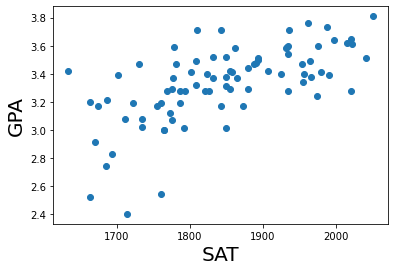

In [6]:
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

The graph showed a strong linear relationship between SAT and GPA. So we can go to the next step.

### Linear Regression

We need to create a new variable x to estimate the regression equation y = b0+b1*x1

In [7]:
x = sm.add_constant(x1)
#x is used to represent x0, which is 1, for the equation y = b0*x0 + b1*x1. Here the x0 = 1
results = sm.OLS(y,x).fit()
#results will contain the output of the Ordinary Least Squares (OLS) regression
#fit() method will apply a specific estimation technique (OLS in this case) to obtain the fit of the model.
results.summary()
#summary method display the estimation results and organize them into 3 tables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           7.20e-11
Time:                        15:15:31   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### interpretation of the OLS Regression results tables

OLS table:

    * The OLS is the most used linear regression model. Other models include: generalized least squares, maximum likelihood estimation, Bayesian regression, kernel regression, Gaussian process regression.
    
    * R-squared = SSR/SST, ranging from 0 to 1. Measures the goodness of fit of the model. The more factors you include in your regression, the higher the R squared. when R^2 = 0 --> the regression line explains non of the variability of the data. The higher the better. R^2 = 0.406 --> SAT scores explain 40.6% of the variability of the GPA.
    
    * Adjusted R-squared: always smaller than the R-squared as it penalizes excessive use of variables
    
    * F-statistic: a test for overall significance of the model. The null hypothesis is: all the betas are equal to 0 simultaneously. The alternative hypothesis is: at least one beta differs from zero. If all betas are 0, then none of the independent variables matter. The higher the better.
    
    * Prob (F-statistic): p-value of F-statistic.
    
coefficient table: 
    
    * has the coefficient of the intercept (constant) and the slope of the linear regression model.
    
    * std err: standard error shows the accuracy of prediction. The lower the better.
    
    * t = t statistics
    
    * p>|t|=p-value. The p-value for the constant is not that important because what we care is the causal relationshp of the dependent variable and independent variable. We want the p-value to be small for the 'SAT' variable.
    

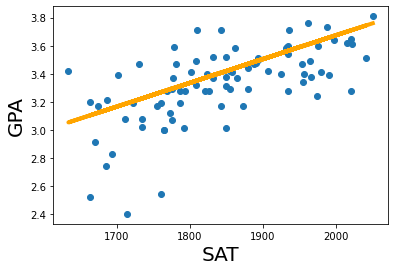

In [8]:
#plot the regression line on the same scatterplot previously
plt.scatter(x1,y)
yhat = 0.0017*x1 +0.275
fig = plt.plot(x1,yhat,lw=4,c='orange',label = 'regression line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

In [9]:
#use seaborn to show the graph
import seaborn as sns
sns.set()
#sns.set() overrides the style and the graphics of all matplotlib graphs

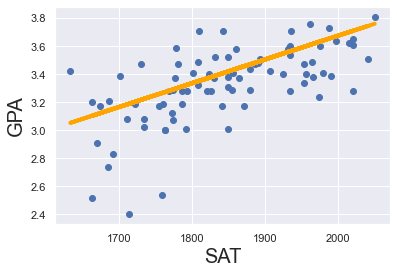

In [10]:
#repeat the graph previously use only matplotlib
plt.scatter(x1,y)
yhat = 0.0017*x1 +0.275
fig = plt.plot(x1,yhat,lw=4,c='orange',label = 'regression line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

### Variability
* Sum of squares total (SST) = TSS = the squared differences between the observed dependent variable and its mean. Measures the total variability of the dataset.

* Sum of squares regression (SSR) = Explain sum of squares (ESS) = sum of the differences between the **predicted value** and the mean of the dependent variable. Measures how well your line fits the data. If SSR = SST --> regression model captures all the observed variability and is perfect.

* Sum of squares error (SSE) = residual sum of squares (RSS)

    Error = the difference between the observed value and the predicted value.
    
**SST = SSR + SSE: the total variability = explained variability by the regression line + unexplained variability due to error**

## Multiple linear regression
### Load the data

In [12]:
data = pd.read_csv('1.02. Multiple linear regression.csv')
data
#the Rand,1,2,3 column is randomly generated 1,2,3 numbers to each row. This cannot predict GPA

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


### Create multiple regression model

In [13]:
y = data['GPA']
x1 = data[['SAT','Rand 1,2,3']]

In [14]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           6.58e-10
Time:                        16:10:07   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Adjusted R-square explained
From the previous single linear regression model, the R-squared was 0.406 and the Adj. R-squared was 3.999. From the adjusted R-square, although we added information but we lost the adjusted R-square value. This means the newly added information is not strongly correlated. From the coefficient table, the coef of Rand 1,2,3 column is -0.0083. And the p-value is 0.762. This also shows that the newly added column is useless. Therefore, this Rand 1,2,3 column should be dropped. 

**Adjusted R-square is the basis for comparing models**

* have the same dependent variable (y)
* Use the same dataset

### Using dummy variables for categorical data
Create n-1 dummy variables for n different categories in order to avoid multicollinearity. (When all the other dummies are 0, then the left one variable must be 1, there's no use to introduce an extra column for the left one variable)

to create dummy variables easily, use: **pd.get_dummies(df, drop_first=True)** function.

The drop_first = True will drop the first variable to create n-1 dummies.

In [16]:
raw_data = pd.read_csv('1.03. Dummies.csv')

In [17]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [18]:
# make a copy of the data
data = raw_data.copy()

In [19]:
# imitating the categories with numbers. Yes = 1, No = 0
data['Attendance'] = data['Attendance'].map({'Yes':1,'No':0})
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [20]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [21]:
# create the regression model with dummy variables
y = data['GPA']
x1 = data[['SAT','Attendance']]

In [22]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           2.19e-15
Time:                        15:34:17   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analysis:
The adjusted R-squared = 0.555, which is significant. The F-statistic = 52.7 and the p-value for F-statistic also shows it's significant. The p-value for both SAT and Attendance is 0 showing both variables are significant. The Durbin-Satson = 1.009 showing we don't need to worry about autocorrelation. The AIC is also small enough which means adding the new Attendance variable helps with the prediction. 

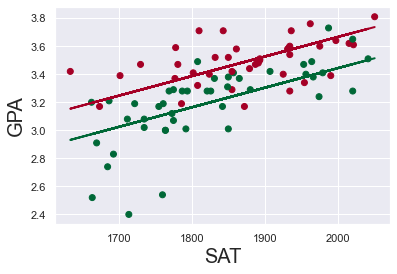

In [24]:
# draw the regression line for both students who attended the class and who didn't attend the class. 
# When attendance = 1, the regression line is 0.6439+1*0.2226 + 0.0014* SAT
plt.scatter(data['SAT'],y,c=data['Attendance'],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
fig = plt.plot(data['SAT'], yhat_no, lw=2, c = '#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c = '#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()
#red line is students who attended, green line is students who didn't attend.

### make predictions based on the regressions

In [25]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [26]:
# predict students got 1700 on SAT and didn't attend, and 1670 on SAT and attended
new_data = pd.DataFrame({'const':1, 'SAT':[1700,1670], 'Attendance':[0,1]})
# rearrange the data column order
new_data = new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [27]:
# change the index of the table
new_data.rename(index = {0:'Bob',1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [28]:
# the fitted regression model was results <-- results = sm.OLS(y,x).fit()
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [31]:
# transfer the result into dataframe and join with the previous table
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index = {0:'Bob',1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


# Linear Regression with sklearn

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [33]:
data = pd.read_csv('1.01. Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [34]:
#SAT is the feature, GPA is the target
x = data['SAT']
y = data['GPA']

In [38]:
x.shape
#x column is a 1-D array. we need to reshape it into a matrix to fit the machine learning model

(84,)

In [36]:
y.shape

(84,)

In [39]:
x_matrix = x.values.reshape(84,1)
# or using x_matrix = x.values.reshape(-1,1) to get the same result

In [37]:
reg = LinearRegression()

In [42]:
#sklearn has a different order of input and output than statsmodel
reg.fit(x_matrix,y)


LinearRegression()

To change the x into x_matrix is because we only have 1 independent variable here, but sklearn expects to receive multiple variables. We only need to change the x array into a 2D matrix when we only have 1 variable.

In [43]:
# to get the R-squared
reg.score(x_matrix,y)

0.40600391479679765

In [44]:
# to get the coefficients
reg.coef_

array([0.00165569])

In [45]:
# to get the intercept
reg.intercept_

0.2750402996602803

In [57]:
#making predictions
value = pd.DataFrame({'SAT':[1740]})
value_matrix = value['SAT'].values.reshape(-1,1)
reg.predict(value_matrix)

array([3.15593751])

## Multiple linear regression with sklearn

In [58]:
data = pd.read_csv('1.02. Multiple linear regression.csv')
data.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [59]:
x = data[['SAT','Rand 1,2,3']]
y = data['GPA']

In [60]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [62]:
# the coefficient is ordered in the way we fed them. In this case, coef for SAT and coef for Rand 1,2,3
reg.coef_

array([ 0.00165354, -0.00826982])

In [63]:
reg.intercept_

0.29603261264909486

In [64]:
# calculate the R-squared
reg.score(x,y)

0.40668119528142843

Adjusted R-square formula
$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

n = number of observations
p = number of predictors

In [66]:
x.shape

(84, 2)

In [65]:
# calculate adjusted R square
r2 = reg.score(x,y)
n = x.shape[0]
p = x.shape[1]
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.39203134825134023

to detect the bariables which are unneeded in the model, use feature selection by calculating the p-values. sklearn doesn't have statistical functions to calculate p-values. Use feature_selection.f_regression. --> F-regression creates simple linear regressions of each feature and the dependent variable. And then it calculate the f-statistics for each of the variables and return the p-values.

### Feature selection

In [67]:
from sklearn.feature_selection import f_regression

In [68]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

To interpret the result: the first array contains the F-statistics for the variables, and the 2nd array contains the p-values.

In [69]:
p_values = f_regression(x,y)[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

In [70]:
#round the result to 3 digits
p_values.round(3)

array([0.   , 0.676])

### creating a summary table

In [71]:
reg_summary = pd.DataFrame(data = x.columns.values, columns = ['Freatures'])
reg_summary

,Freatures
0,SAT
1,"Rand 1,2,3"


In [72]:
reg_summary['Coeeficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)

In [73]:
reg_summary

,Freatures,Coeeficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


### Feature scaling = standardization
standardized variable = $\frac{x-\mu}{\sigma}$

$\mu$ = mean of original variable

x = original variable

$\sigma$ = standard deviation of original variable

in sklearn, the StandardScaler() function is a reprocessing module used to standardize or scale data.

In [74]:
from sklearn.preprocessing import StandardScaler

In [77]:
x = data[['SAT','Rand 1,2,3']]
y = data['GPA']

In [75]:
#create an empty standardscaler data. the scaler will be used to subtract the mean and divide by the standard deviation
scaler = StandardScaler()

In [79]:
#fit the input data
scaler.fit(x)

StandardScaler()

In [81]:
#transforms the unscaled inputs using the information contained in the scaler object
#aka subtract the mean and divided by the standard deviation
x_scaled = scaler.transform(x)

Feature scaling is a great way to compare the impact of the variables. For example, from the coefficient alone, the coefficient of Rand 1,2,3 is slightly larger than the coefficient of SAT column. However, the SAT values are around 1700 while the Rand 1,2,3 column's value is just 1,2,3. When multiply the value with the coefficient, the SAT's impact is larger to the final result. In order to figure out the impact of the variables and not being disguised by the coefficient, we can use feature scaling.

In [83]:
#create new regression using scaled features
reg = LinearRegression()
reg.fit(x_scaled,y)

LinearRegression()

In [84]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [85]:
reg.intercept_

3.330238095238095

In [87]:
#creating a summary table
reg_summary = pd.DataFrame([['Intercept'],['SAT'],['Rand 1,2,3']], columns=['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

In [88]:
reg_summary

,Features,Weights
0,Intercept,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


After feature scaling, the coefficient of SAT column is much larger than the Rand 1,2,3. The bigger the weight/coefficient, the bigger the impact after feature scaling.

### making predictions with the standardized coefficients (weights)

In [89]:
new_data = pd.DataFrame(data=[[1700,2],[1800,1]],columns = ['SAT','Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [90]:
#scale the new data
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [91]:
reg.predict(new_data_scaled)

array([3.09051403, 3.26413803])

### Underfitting vs. overfitting
underfitting: low accuracy that it doesn't capture any logic

overfitting: too high train accuracy. it captures all the noises and thus misses the point

in order to avoid overfitting, we can split the data into training part and testing part to test how well is the model

## Train Test Split

In [92]:
import numpy as np
from sklearn.model_selection import train_test_split

In [93]:
#generage data to split
a = np.arange(1,101)
a

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [94]:
b = np.arange(501,601)
b

array([501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513,
       514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526,
       527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539,
       540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552,
       553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565,
       566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578,
       579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591,
       592, 593, 594, 595, 596, 597, 598, 599, 600])

In [95]:
#split the data
train_test_split(a)

[array([45, 81, 82, 29, 95, 80, 54, 92, 44, 83, 51, 43, 12, 42, 67, 93, 61,
        35,  6, 20, 87, 75, 73, 77, 37, 65, 70, 98, 22, 39, 34, 52, 15, 78,
        18, 63, 27, 76, 66, 91, 24, 50, 97, 10, 16,  7, 21, 14, 86,  8, 71,
         2, 72, 13, 17, 41,  3, 25, 84, 60, 64, 40, 36, 85, 68, 19, 56,  5,
        79, 28, 96, 89, 11, 99, 59]),
 array([ 90,  55,  88,  49,  33,  38,  46,  58,  31,  94,  26,  47,  69,
        100,  62,   9,  57,  48,   4,   1,  74,  32,  30,  53,  23])]

In [96]:
a_train, a_test = train_test_split(a)

In [97]:
#explore the result
a_train.shape, a_test.shape

((75,), (25,))

The default split is 75% to 25%, and the arrays are shuffled. Everytime we run the split data, the data changes.

In [99]:
#set split size, and not shuffle the array
a_train, a_test = train_test_split(a, test_size = 0.2, shuffle = False)

In [100]:
#to set the split array the same everytime, use random_state=42 (a conventional number used)
a_train, a_test = train_test_split(a, random_state=42)

In [101]:
#split multiple array at the same time
a_train, a_test, b_train, b_test = train_test_split(a, b)

In [102]:
a_test

array([76, 50, 10, 79, 51, 67, 34, 85, 83, 54, 72, 11, 39, 99, 80, 36, 13,
       73, 47,  4, 74, 96, 82, 38,  9])

In [103]:
b_train

array([520, 568, 590, 530, 537, 598, 519, 569, 589, 597, 588, 522, 561,
       562, 502, 506, 535, 548, 542, 514, 591, 508, 533, 531, 593, 503,
       527, 529, 584, 600, 595, 556, 587, 552, 515, 560, 526, 553, 507,
       525, 524, 545, 544, 564, 577, 570, 543, 518, 540, 549, 571, 512,
       532, 563, 557, 578, 581, 559, 592, 566, 594, 501, 541, 505, 528,
       575, 546, 586, 521, 517, 565, 516, 523, 558, 555])

In [104]:
b_test

array([576, 550, 510, 579, 551, 567, 534, 585, 583, 554, 572, 511, 539,
       599, 580, 536, 513, 573, 547, 504, 574, 596, 582, 538, 509])

To test whether the model is a good fit, draw scatter plot of the y_test(targets) and the y hat test (predictions). If it's good, then the data is generally arranged along the regression line that is a 45 degree tilted diagonal line.